#### Isolating Music Channels

In [1]:
import numpy as np
import scipy.io.wavfile as wav
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-2lmuq3zt because the default path (/tmp/cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


Most music recordings are stored in _stereo_ format, meaning there are separate audio tracks (channels) that are played on the left and right speakers creating the illusion of an audible "perspective".  Because each channel stores different information, data from each can be used to isolate tracks for instrumentals, vocals, etc.

For example, many pop songs store vocals in the "center" and so the vocal track can be removed by checking where both channels overlap with each other.  Karaoke versions of songs are often made in this way.

You are given two audio files, representing a left and right channel respectively.  These have the same duration and audio rate:

- `bohemian_l.txt`
- `bohemian_r.txt`




In [2]:
bohemian_rate = 44100

(100000,)


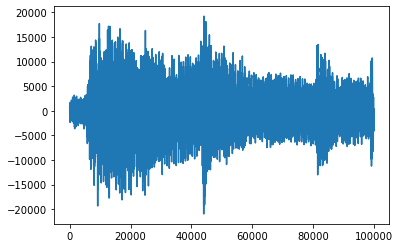

In [3]:
bohemian_l = np.loadtxt('bohemian_l.txt')
print(bohemian_l.shape)
plt.plot(bohemian_l)

(100000,)


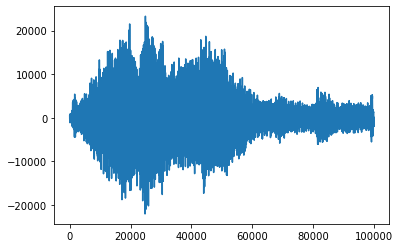

In [4]:
bohemian_r = np.loadtxt('bohemian_r.txt')
print(bohemian_r.shape)
plt.plot(bohemian_r)

In [5]:
# Playing stereo sound is slightly different than mono (one channel) sound because more information is needed.
# You don't need to do this to play the individual tracks.

ipd.Audio(np.array([bohemian_l, bohemian_r]), rate=bohemian_rate)

**Check your answers!**

These channels each contain a mix of the vocals and instrumental tracks such that:

$$
\begin{align*}
\text{bohemian_l} &= 2\ \text{instr} + 1\ \text{vocals} \\
\text{bohemian_r} &= 1\ \text{instr} + 2\ \text{vocals}
\end{align*}
$$

The above equations just give the linear combination of `instr` and `vocals` that create the `bohemian_l` and `bohemian_r` channels.

Can you manipulate the two channels to isolate each track? 

Basically, you need to solve the system of equations to find `instr` and `vocals` given the arrays `bohemian_l` and `bohemian_r`. 

In [7]:
#grade (DO NOT REMOVE THIS LINE)
instr = (2 * bohemian_l - bohemian_r) / 3
vocals = (2 * bohemian_r - bohemian_l) / 3

In [9]:
ipd.Audio(instr, rate=bohemian_rate)

In [11]:
ipd.Audio(vocals, rate=bohemian_rate)